## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 
#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

In [3]:
import json
import numpy as np

# 读取 JSON 文件
with open('hw4_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# 提取节点和边
nodes = [node[0] for node in data['nodes']]
edges = data['edges']

# 初始化邻接矩阵
size = len(nodes)
adj_matrix = np.zeros((size, size))

# 填充邻接矩阵
for edge in edges:
    from_user = edge[0]
    to_user = edge[1]
    weight = edge[2]
    
    from_index = nodes.index(from_user)
    to_index = nodes.index(to_user)
    
    adj_matrix[from_index][to_index] = weight
    adj_matrix[to_index][from_index] = weight  # 假设是无向图

print("邻接矩阵:")
print(adj_matrix)


邻接矩阵:
[[ 0.   25.3  25.09  9.62  2.1   0.    0.    0.    0.    1.14  0.    0.
   0.86 11.85  7.25  2.34  0.    0.    0.    0.    0.    0.    4.25  4.5
   0.    0.    3.11  7.39  3.61  0.    0.  ]
 [25.3   0.   24.84  6.4   0.97  0.    0.    0.    0.    0.    0.    0.
   0.   11.92  6.58  0.    0.    0.    0.    0.    0.    0.    4.55  4.84
   0.    0.    3.27  7.73  3.82  0.    0.  ]
 [25.09 24.84  0.   12.48  3.96  3.27  2.52  2.1   0.    3.56  1.5   0.
   4.11 13.85  8.1   3.86  2.36  0.    1.33  1.09  2.24  0.    4.66  4.97
   0.    0.    3.32  7.63  3.9   1.    2.1 ]
 [ 9.62  6.4  12.48  0.   11.87  9.15  7.73  6.96  6.85 15.28  7.93  6.54
   9.84  7.15  4.1  10.64  7.32  2.32  5.19  7.84  5.09  3.51  3.21  3.35
   4.19  3.05  2.51  3.87  2.83  2.84  2.96]
 [ 2.1   0.97  3.96 11.87  0.    7.62  5.33  8.44  6.84  6.29  9.52  1.51
   6.4   1.77  0.89  5.48  7.29  1.2   6.71  5.92  2.84  1.26  0.84  0.85
   1.34  1.2   0.78  0.88  0.81  1.09  0.89]
 [ 0.    0.    3.27  9.15  7.62  0. 

In [4]:
import json

# 读取 JSON 文件
with open('hw4_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# 提取节点和边
nodes = [node[0] for node in data['nodes']]
edges = data['edges']

# 初始化字典来存储直接朋友
direct_friends = {node: [] for node in nodes}

# 填充直接朋友列表
for edge in edges:
    from_user = edge[0]
    to_user = edge[1]
    
    direct_friends[from_user].append(to_user)
    direct_friends[to_user].append(from_user)  # 假设是无向图

# 打印每个用户的直接朋友
for user, friends in direct_friends.items():
    print(f"{user}: {friends}")


Yanyan-Wang: ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin']
Aarebecca: ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy']
pomelo-nwu: ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975']
tyn1998: ['andyhuang18', 'pomelo-nwu', 'frank-zsy', 'wj23027', 'bifenglin', 'Yanyan-Wang', 'will-ww', 'Zzzzzhuzhiwei', 'lhbvvvvv', 'zhicheng-ning', 'PureNatural', 'yangzy0603', 'xgdyp', 'stevending1st', 'wxharry', 'Aarebecca', 'birdflyi', 'xiaoya-yaya', 'pranavshuklaa', 'lidongze0629', 'yvonneyx', 'stealth-bombeer

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。


In [5]:
import json

# 读取 JSON 文件
with open('hw4_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# 提取节点和边
nodes = [node[0] for node in data['nodes']]
edges = data['edges']

# 初始化字典来存储直接朋友
direct_friends = {node: [] for node in nodes}

# 填充直接朋友列表
for edge in edges:
    from_user = edge[0]
    to_user = edge[1]
    
    direct_friends[from_user].append(to_user)
    direct_friends[to_user].append(from_user)  # 假设是无向图

# 计算每个用户的度数
user_degrees = {user: len(friends) for user, friends in direct_friends.items()}

# 找到度数最多的前5个用户
top_users = sorted(user_degrees.items(), key=lambda item: item[1], reverse=True)[:5]

# 打印结果
print("度数最多的前5个用户及其朋友数量:")
for user, degree in top_users:
    print(f"用户: {user}, 度数: {degree}")


度数最多的前5个用户及其朋友数量:
用户: tyn1998, 度数: 30
用户: frank-zsy, 度数: 30
用户: pomelo-nwu, 度数: 24
用户: andyhuang18, 度数: 23
用户: wj23027, 度数: 23


In [6]:
import json

# 读取 JSON 文件
with open('hw4_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# 提取节点及其影响力分数
nodes = data['nodes']

# 创建一个字典来存储用户及其影响力分数
user_influence = {node[0]: node[1] for node in nodes}

# 找到影响力最高的前5个用户
top_influencers = sorted(user_influence.items(), key=lambda item: item[1], reverse=True)[:5]

# 打印结果
print("影响力最高的前5个用户及其分数:")
for user, influence in top_influencers:
    print(f"用户: {user}, 影响力分数: {influence}")


影响力最高的前5个用户及其分数:
用户: Yanyan-Wang, 影响力分数: 50.95
用户: Aarebecca, 影响力分数: 23.82
用户: pomelo-nwu, 影响力分数: 22.36
用户: tyn1998, 影响力分数: 16.64
用户: frank-zsy, 影响力分数: 15.8


In [7]:
import json

# 读取 JSON 文件
with open('hw4_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# 提取节点及其影响力分数
nodes = data['nodes']
edges = data['edges']

# 创建字典存储影响力分数
user_influence = {node[0]: node[1] for node in nodes}

# 创建字典存储直接朋友
direct_friends = {node[0]: [] for node in nodes}
for edge in edges:
    from_user = edge[0]
    to_user = edge[1]
    direct_friends[from_user].append(to_user)
    direct_friends[to_user].append(from_user)  # 假设是无向图

# 计算用户的综合影响力得分
user_scores = {}
for user in nodes:
    influence_score = user_influence[user[0]]
    friend_count = len(direct_friends[user[0]])
    # 加权计算
    score = 0.5 * influence_score + 0.5 * friend_count
    user_scores[user[0]] = score

# 找到综合影响力最高的前5个用户
top_influencers = sorted(user_scores.items(), key=lambda item: item[1], reverse=True)[:5]

# 打印结果
print("综合考虑影响力分数和朋友数量，最有影响力的用户:")
for user, score in top_influencers:
    print(f"用户: {user}, 综合得分: {score}")


综合考虑影响力分数和朋友数量，最有影响力的用户:
用户: Yanyan-Wang, 综合得分: 32.475
用户: tyn1998, 综合得分: 23.32
用户: pomelo-nwu, 综合得分: 23.18
用户: frank-zsy, 综合得分: 22.9
用户: Aarebecca, 综合得分: 17.41


#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。

In [8]:
import json
from collections import Counter

# 读取 JSON 文件
with open('hw4_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# 提取节点和边
nodes = data['nodes']
edges = data['edges']

# 创建字典存储直接朋友
direct_friends = {node[0]: [] for node in nodes}
for edge in edges:
    from_user = edge[0]
    to_user = edge[1]
    direct_friends[from_user].append(to_user)
    direct_friends[to_user].append(from_user)  # 假设是无向图

# 找到用户 Yanyan-Wang 的朋友
yanyan_friends = direct_friends["Yanyan-Wang"]

# 收集“朋友的朋友”
friends_of_friends = Counter()

for friend in yanyan_friends:
    for friend_of_friend in direct_friends[friend]:
        if friend_of_friend != "Yanyan-Wang" and friend_of_friend not in yanyan_friends:
            friends_of_friends[friend_of_friend] += 1

# 找到最有可能成为新朋友的用户
recommended_user = friends_of_friends.most_common(1)

# 打印结果
if recommended_user:
    user, common_count = recommended_user[0]
    print(f"推荐的用户: {user}")
    print(f"推荐理由: 该用户与 Yanyan-Wang 有 {common_count} 个共同的朋友。")
else:
    print("没有找到推荐的用户。")


推荐的用户: will-ww
推荐理由: 该用户与 Yanyan-Wang 有 6 个共同的朋友。


In [9]:
import json

# 读取 JSON 文件
with open('hw4_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# 提取节点和边
nodes = data['nodes']
edges = data['edges']

# 创建字典存储直接朋友和连接强度
connections = {}

# 填充连接信息
for edge in edges:
    from_user = edge[0]
    to_user = edge[1]
    weight = edge[2]
    
    # 更新连接强度
    if from_user not in connections:
        connections[from_user] = {}
    if to_user not in connections:
        connections[to_user] = {}
        
    connections[from_user][to_user] = weight
    connections[to_user][from_user] = weight  # 假设是无向图

# 获取 Yanyan-Wang 的直接朋友
yanyan_friends = connections["Yanyan-Wang"]

# 初始化一个字典来存储与 Yanyan-Wang 的连接强度
recommended_users = {}

# 计算与 Yanyan-Wang 的连接强度
for friend, weight in yanyan_friends.items():
    recommended_users[friend] = weight

# 检查朋友的朋友
for friend in yanyan_friends:
    for friend_of_friend, weight in connections[friend].items():
        if friend_of_friend != "Yanyan-Wang" and friend_of_friend not in recommended_users:
            recommended_users[friend_of_friend] = weight
        elif friend_of_friend != "Yanyan-Wang":
            recommended_users[friend_of_friend] += weight  # 增加连接强度

# 找到与 Yanyan-Wang 连接强度最高的5个用户
top_users = sorted(recommended_users.items(), key=lambda item: item[1], reverse=True)[:5]

# 打印结果
print("与 Yanyan-Wang 连接强度最高的5个用户:")
for user, strength in top_users:
    print(f"用户: {user}, 连接强度: {strength}")


与 Yanyan-Wang 连接强度最高的5个用户:
用户: pomelo-nwu, 连接强度: 124.32999999999998
用户: tyn1998, 连接强度: 103.15
用户: Aarebecca, 连接强度: 100.22
用户: yangzy0603, 连接强度: 75.62
用户: yvonneyx, 连接强度: 48.82000000000001


#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

Matplotlib is building the font cache; this may take a moment.
C:\Users\m1852\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m1852\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25143 (\N{CJK UNIFIED IDEOGRAPH-6237}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m1852\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m1852\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m1852\AppData\Ro

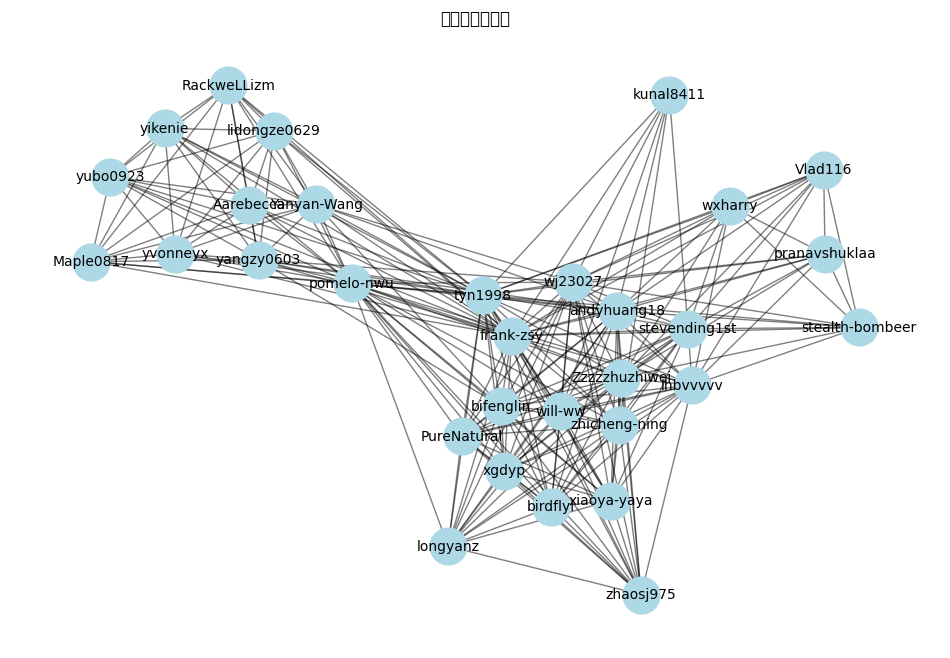

In [10]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# 读取 JSON 文件
with open('hw4_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# 提取节点和边
edges = data['edges']

# 创建图
G = nx.Graph()

# 添加边到图中
for edge in edges:
    from_user = edge[0]
    to_user = edge[1]
    weight = edge[2]
    G.add_edge(from_user, to_user, weight=weight)

# 绘制图形
plt.figure(figsize=(12, 8))

# 使用 spring 布局
pos = nx.spring_layout(G, k=0.5)

# 绘制节点
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

# 绘制边
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# 绘制标签
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# 设置标题
plt.title("用户关系网络图")
plt.axis('off')  # 关闭坐标轴
plt.show()


C:\Users\m1852\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m1852\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33410 (\N{CJK UNIFIED IDEOGRAPH-8282}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m1852\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m1852\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\m1852\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py

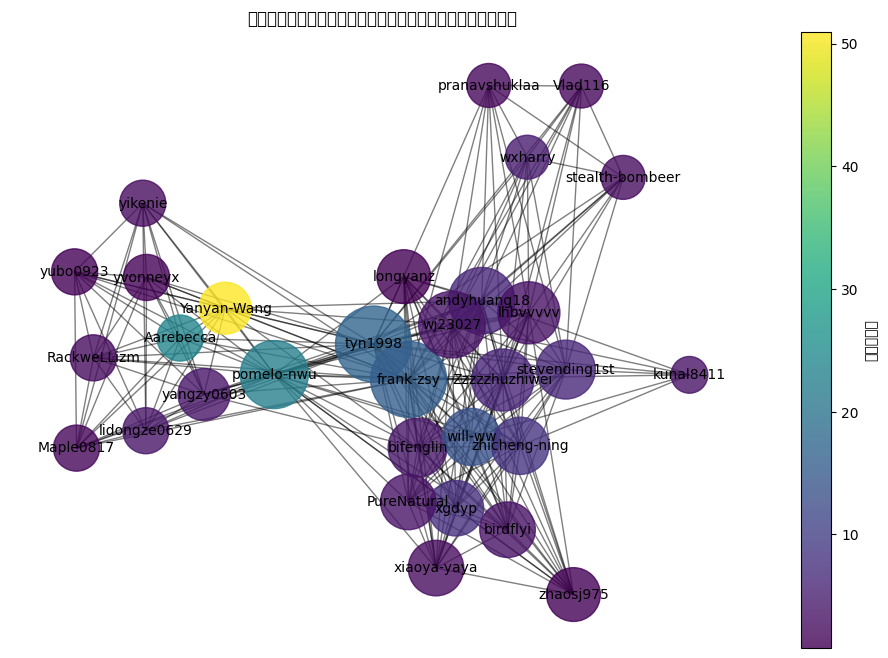

In [11]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 读取 JSON 文件
with open('hw4_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# 提取节点和边
nodes = data['nodes']
edges = data['edges']

# 创建图
G = nx.Graph()

# 添加边到图中
for edge in edges:
    from_user = edge[0]
    to_user = edge[1]
    weight = edge[2]
    G.add_edge(from_user, to_user, weight=weight)

# 计算节点的影响力得分和度数
influence_scores = {node[0]: node[1] for node in nodes}
degrees = dict(G.degree())

# 节点大小和颜色
node_sizes = [degrees[node] * 100 for node in G.nodes()]  # 根据度数调整节点大小
node_colors = [influence_scores[node] for node in G.nodes()]  # 根据影响力得分调整颜色

# 绘制图形
plt.figure(figsize=(12, 8))

# 使用 spring 布局
pos = nx.spring_layout(G, k=0.5)

# 绘制节点
sc = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap='viridis', alpha=0.8)

# 绘制边
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# 绘制标签
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# 添加颜色条
plt.colorbar(sc, label='影响力得分')

# 设置标题
plt.title("用户关系网络图（节点大小代表度数，颜色代表影响力得分）")
plt.axis('off')  # 关闭坐标轴
plt.show()
